<a href="https://colab.research.google.com/github/Savaliyaniks1/Project_5/blob/main/Satisfaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **** Satisfaction Analysis ****

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
satisfaction_df = pd.read_csv(r"/content/Experience Analysis.csv")

In [3]:
satisfaction_df.head()

,TCP Retransmission,RTT,Handset Type,Throughput,Cluster
0,1.584457e+07,75.636695,Apple iPhone 7 (A1778),9796.009749,0
1,2.156957e+07,115.000000,Apple iPhone Se (A1723),70.000000,0
2,6.192340e+05,152.000000,Apple iPhone 6 (A1586),9792.000000,1
3,1.842327e+07,123.229294,Samsung Galaxy S8 Plus (Sm-G955F),25303.250000,0
4,2.156957e+07,34.000000,Apple iPhone 7 Plus (A1784),117.000000,0


In [4]:
# Define weights for each metric
weight_rtt = 0.4
weight_throughput = 0.4
weight_tcp_retransmission = 0.2

# Calculate experience score
satisfaction_df['Experience Score'] = (
    (1 - (satisfaction_df['RTT'] / satisfaction_df['RTT'].max())) * weight_rtt +
    (satisfaction_df['Throughput'] / satisfaction_df['Throughput'].max()) * weight_throughput +
    (1 - (satisfaction_df['TCP Retransmission'] / satisfaction_df['TCP Retransmission'].max())) * weight_tcp_retransmission
)

# Display the updated DataFrame
print(satisfaction_df.head())

   TCP Retransmission         RTT                       Handset Type  \
0        1.584457e+07   75.636695             Apple iPhone 7 (A1778)   
1        2.156957e+07  115.000000            Apple iPhone Se (A1723)   
2        6.192340e+05  152.000000             Apple iPhone 6 (A1586)   
3        1.842327e+07  123.229294  Samsung Galaxy S8 Plus (Sm-G955F)   
4        2.156957e+07   34.000000        Apple iPhone 7 Plus (A1784)   

     Throughput  Cluster  Experience Score  
0   9796.009749        0          0.498669  
1     70.000000        0          0.341497  
2   9792.000000        1          0.440646  
3  25303.250000        0          0.535384  
4    117.000000        0          0.465691  


In [5]:
satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90038 entries, 0 to 90037
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TCP Retransmission  90038 non-null  float64
 1   RTT                 90038 non-null  float64
 2   Handset Type        90038 non-null  object 
 3   Throughput          90038 non-null  float64
 4   Cluster             90038 non-null  int64  
 5   Experience Score    90038 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.1+ MB


In [6]:
satisfaction_df.isnull().sum()/len(satisfaction_df)*100

,0
TCP Retransmission,0.0
RTT,0.0
Handset Type,0.0
Throughput,0.0
Cluster,0.0
Experience Score,0.0


In [8]:
data = pd.read_csv(r"/content/Engagement_Analysis.csv")

In [9]:
data.head()

,MSISDN/Number,Handset Type,Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Application,Sessions_Frequency,Dur. (ms),session_total_traffic,engagement_score
0,3.366447e+10,Huawei B593S-22,535118044.0,33691738.0,Huawei,Email,1.311448e+19,104687.0,568809782.0,7.809280e+23
1,3.365875e+10,Huawei E5180,422406937.0,26026033.0,Huawei,Email,1.304243e+19,104687.0,448432970.0,6.122780e+23
2,3.366274e+10,Samsung Galaxy A8 (2018),93360974.0,50576233.0,Samsung,Others,1.304243e+19,104687.0,143937207.0,1.965279e+23
3,3.366917e+10,Samsung Galaxy S9 Plus (Sm-G965F),193656366.0,32643783.0,Samsung,Netflix,1.304243e+19,104687.0,226300149.0,3.089840e+23
4,3.366555e+10,Huawei B528S-23A,519351173.0,33314765.0,Huawei,Gaming,1.304243e+19,104687.0,552665938.0,7.545948e+23


In [10]:
# Concatenate the DataFrames
combined_data = pd.concat([satisfaction_df,data], axis=1)

In [11]:

# Check for duplicate columns
duplicate_columns = combined_data.columns[combined_data.columns.duplicated()]

# If there are duplicate columns, drop them
if len(duplicate_columns) > 0:
    satisfaction_df = combined_data.loc[:, ~combined_data.columns.duplicated()]

In [12]:
satisfaction_df.head()

,TCP Retransmission,RTT,Handset Type,Throughput,Cluster,Experience Score,MSISDN/Number,Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Application,Sessions_Frequency,Dur. (ms),session_total_traffic,engagement_score
0,1.584457e+07,75.636695,Apple iPhone 7 (A1778),9796.009749,0,0.498669,3.366447e+10,535118044.0,33691738.0,Huawei,Email,1.311448e+19,104687.0,568809782.0,7.809280e+23
1,2.156957e+07,115.000000,Apple iPhone Se (A1723),70.000000,0,0.341497,3.365875e+10,422406937.0,26026033.0,Huawei,Email,1.304243e+19,104687.0,448432970.0,6.122780e+23
2,6.192340e+05,152.000000,Apple iPhone 6 (A1586),9792.000000,1,0.440646,3.366274e+10,93360974.0,50576233.0,Samsung,Others,1.304243e+19,104687.0,143937207.0,1.965279e+23
3,1.842327e+07,123.229294,Samsung Galaxy S8 Plus (Sm-G955F),25303.250000,0,0.535384,3.366917e+10,193656366.0,32643783.0,Samsung,Netflix,1.304243e+19,104687.0,226300149.0,3.089840e+23
4,2.156957e+07,34.000000,Apple iPhone 7 Plus (A1784),117.000000,0,0.465691,3.366555e+10,519351173.0,33314765.0,Huawei,Gaming,1.304243e+19,104687.0,552665938.0,7.545948e+23


In [13]:
satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90038 entries, 0 to 90037
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TCP Retransmission     90038 non-null  float64
 1   RTT                    90038 non-null  float64
 2   Handset Type           90038 non-null  object 
 3   Throughput             90038 non-null  float64
 4   Cluster                90038 non-null  int64  
 5   Experience Score       90038 non-null  float64
 6   MSISDN/Number          17558 non-null  float64
 7   Total DL (Bytes)       17558 non-null  float64
 8   Total UL (Bytes)       17558 non-null  float64
 9   Handset Manufacturer   17558 non-null  object 
 10  Application            17558 non-null  object 
 11  Sessions_Frequency     17558 non-null  float64
 12  Dur. (ms)              17558 non-null  float64
 13  session_total_traffic  17558 non-null  float64
 14  engagement_score       17558 non-null  float64
dtypes:

In [14]:
# Handling missing value

satisfaction_df.isnull().sum()/len(satisfaction_df)*100

,0
TCP Retransmission,0.000000
RTT,0.000000
Handset Type,0.000000
Throughput,0.000000
Cluster,0.000000
Experience Score,0.000000
MSISDN/Number,80.499345
Total DL (Bytes),80.499345
Total UL (Bytes),80.499345
Handset Manufacturer,80.499345


In [15]:
# Calculate the mean for numeric columns only
column_means = satisfaction_df.select_dtypes(include=['number']).mean()

# Now fill missing values with the mean of each numeric column
satisfaction_df.fillna(column_means, inplace=True)

In [16]:
# Fill missing values in categorical columns with the most frequent value
for column in satisfaction_df.select_dtypes(include=['object']).columns:
  most_frequent_value = satisfaction_df[column].mode()[0]
  satisfaction_df[column].fillna(most_frequent_value, inplace=True)

# Check if there are any missing values left
print(satisfaction_df.isnull().sum())

TCP Retransmission       0
RTT                      0
Handset Type             0
Throughput               0
Cluster                  0
Experience Score         0
MSISDN/Number            0
Total DL (Bytes)         0
Total UL (Bytes)         0
Handset Manufacturer     0
Application              0
Sessions_Frequency       0
Dur. (ms)                0
session_total_traffic    0
engagement_score         0
dtype: int64


# Remove Outlier from data

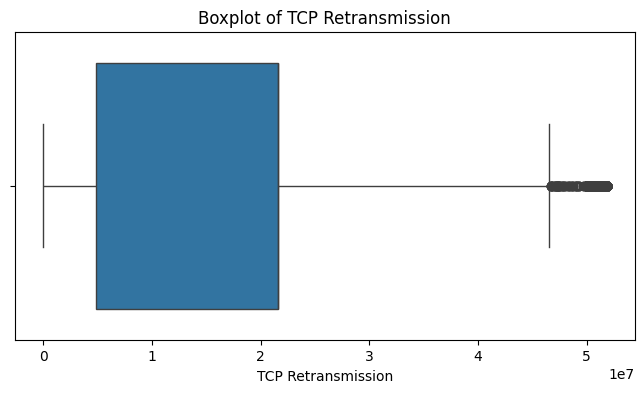

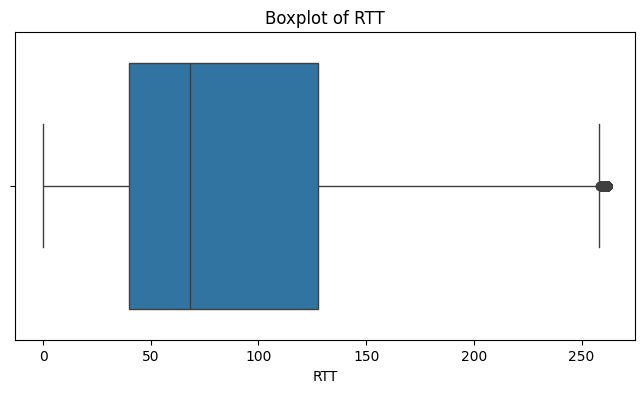

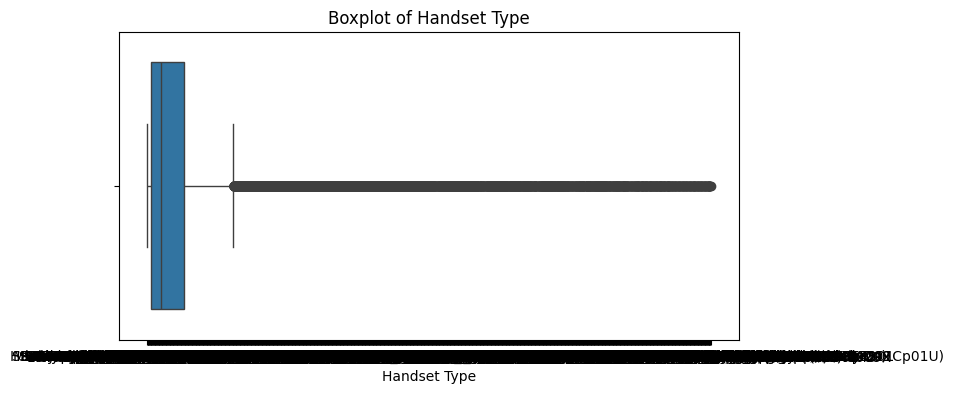

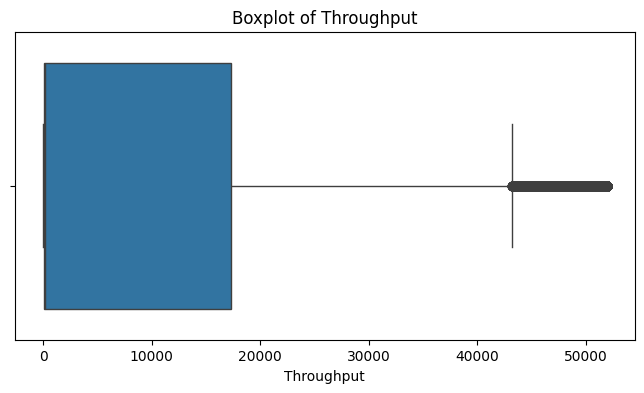

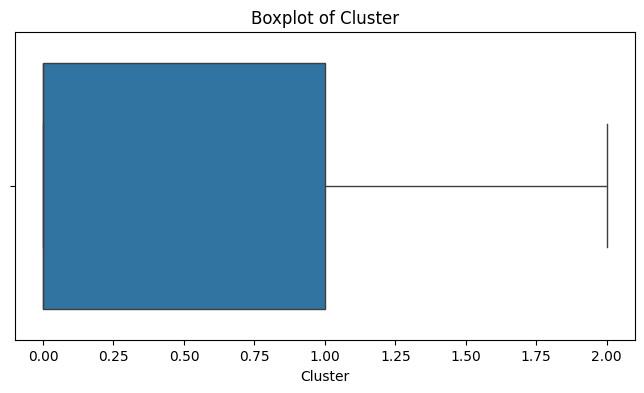

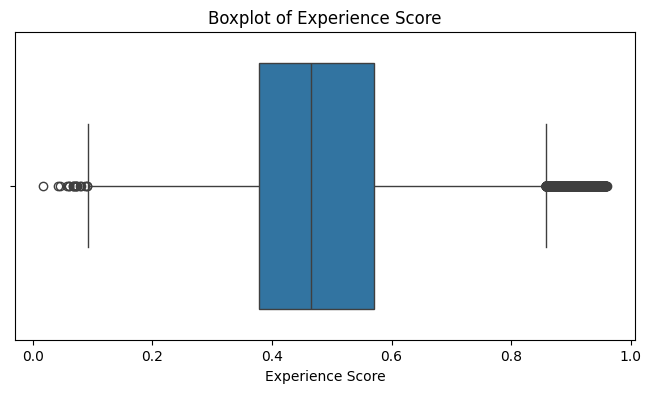

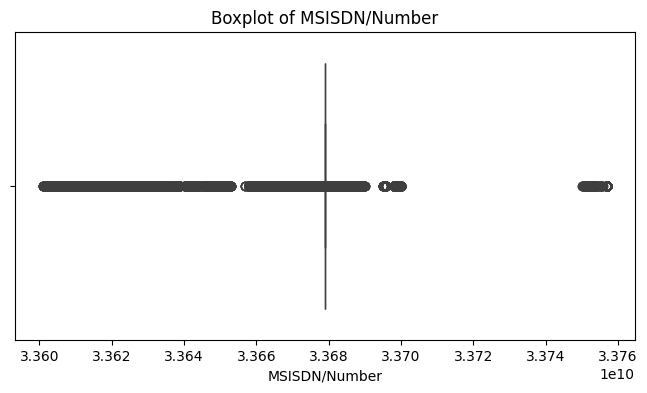

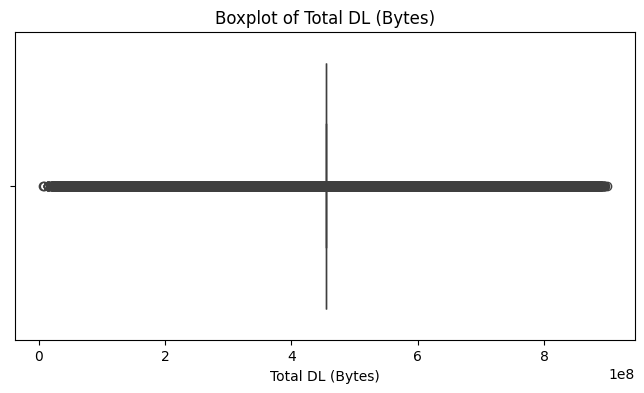

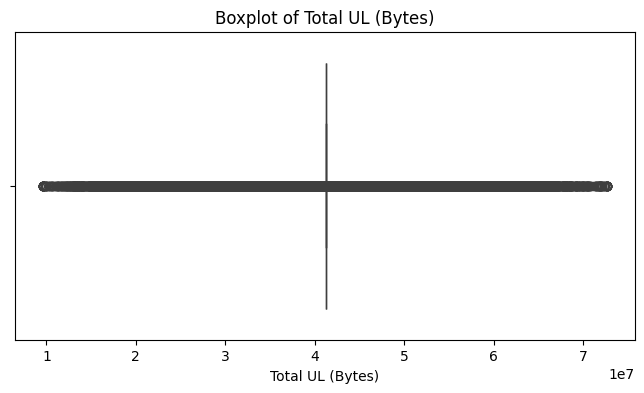

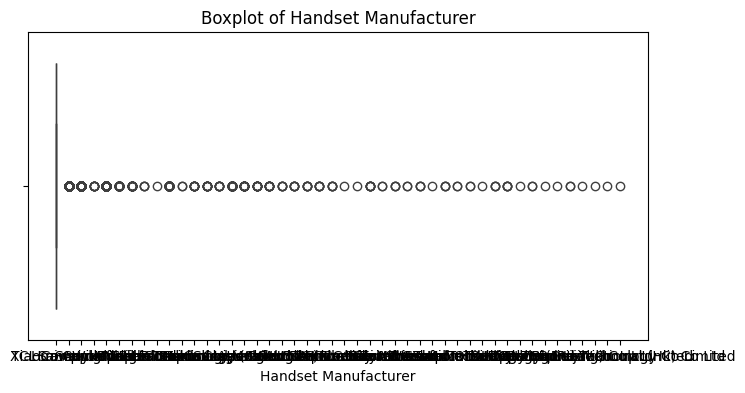

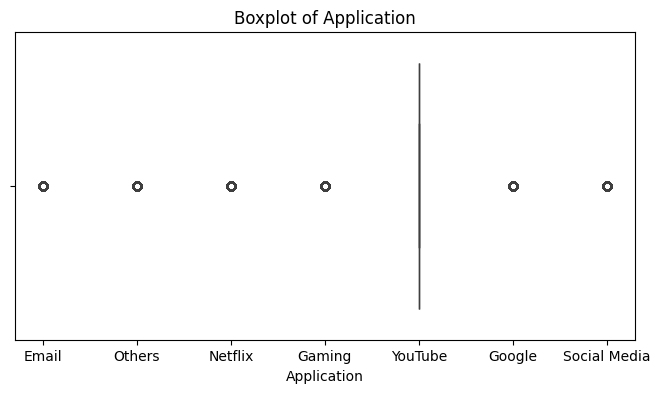

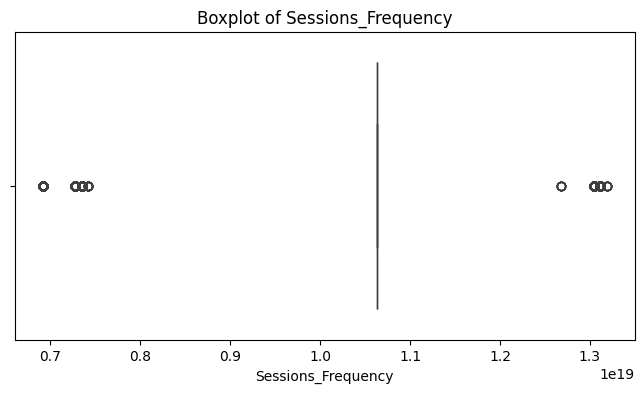

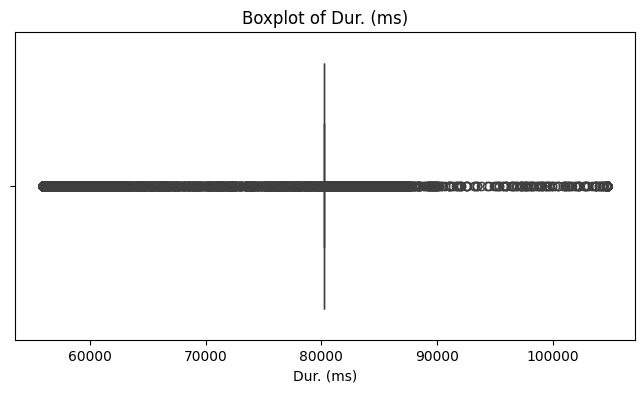

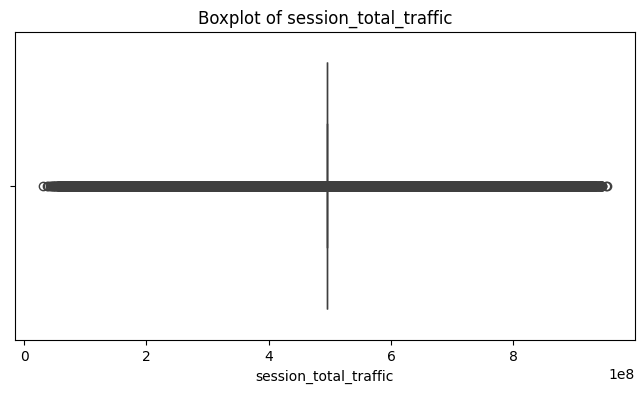

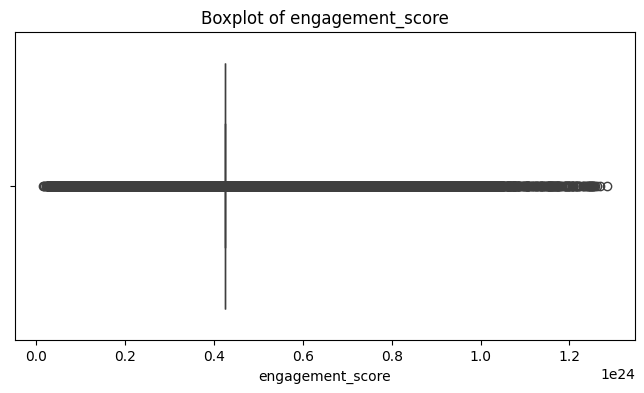

In [17]:
for column in satisfaction_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=satisfaction_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [18]:
def remove_outliers(col):
  sorted(col)
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  l1 = q1-(1.5*iqr)
  u1 = q3+(1.5*iqr)
  return l1,u1

In [19]:
satisfaction_df.columns

Index(['TCP Retransmission', 'RTT', 'Handset Type', 'Throughput', 'Cluster',
       'Experience Score', 'MSISDN/Number', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'Handset Manufacturer', 'Application',
       'Sessions_Frequency', 'Dur. (ms)', 'session_total_traffic',
       'engagement_score'],
      dtype='object')

In [20]:
for i in satisfaction_df[
  [
      'TCP Retransmission',
      'RTT',
      'Throughput',
      'Experience Score',

  ]

]:
  if satisfaction_df[i].dtype != 'object':
    l1,u1 = remove_outliers(satisfaction_df[i])
    satisfaction_df[i] = np.where(satisfaction_df[i] > u1, u1, satisfaction_df[i])
    satisfaction_df[i] = np.where(satisfaction_df[i] < l1, l1, satisfaction_df[i])

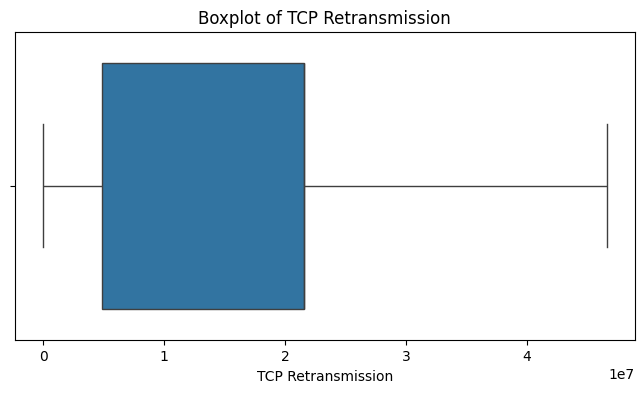

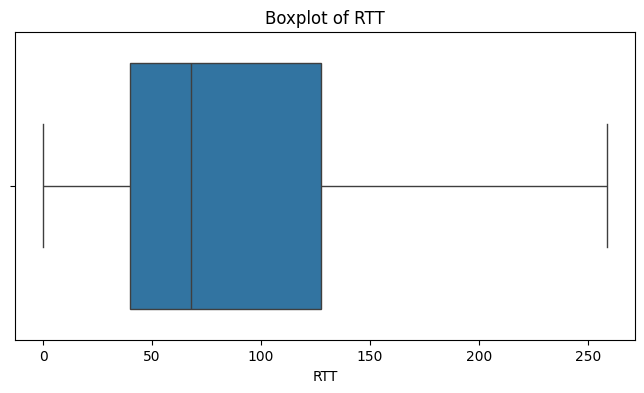

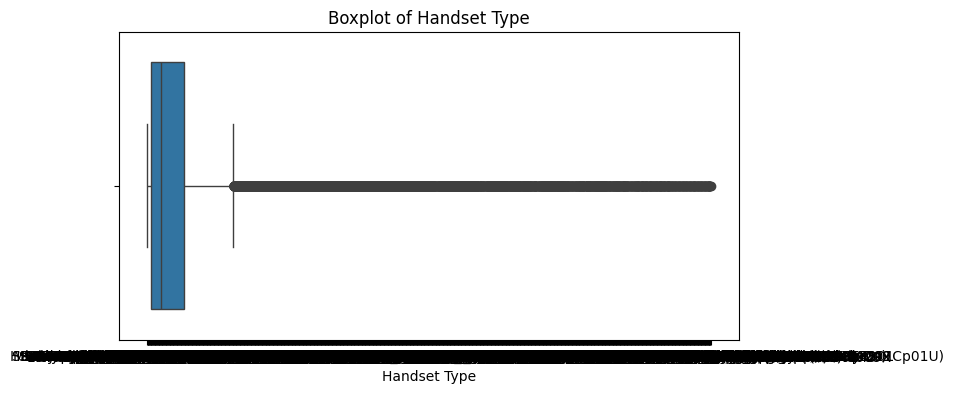

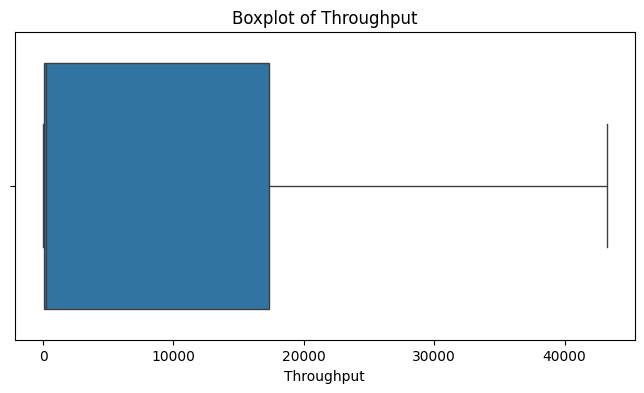

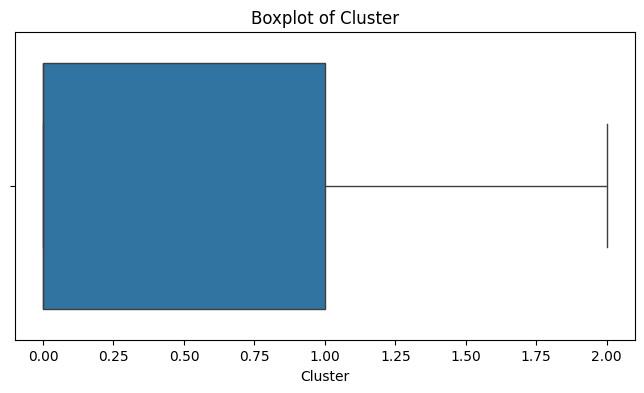

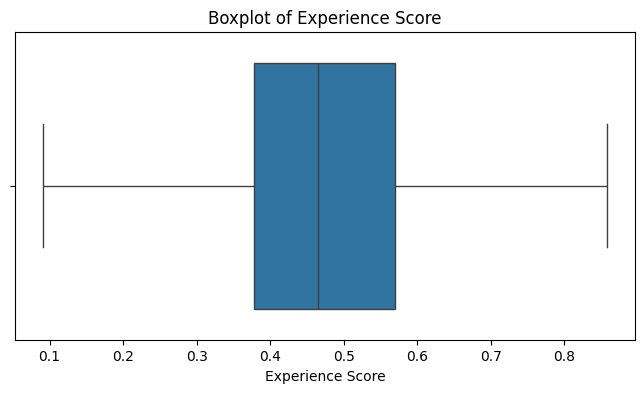

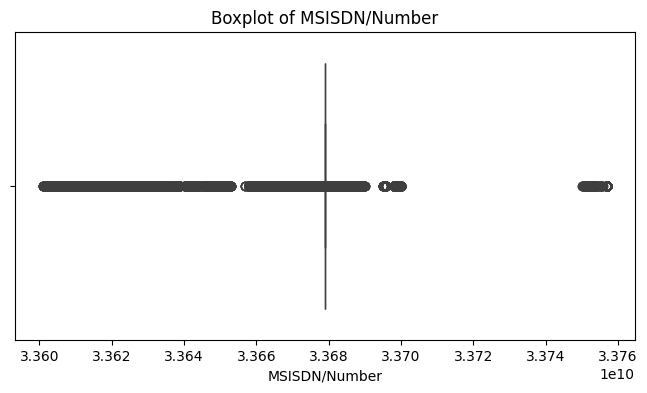

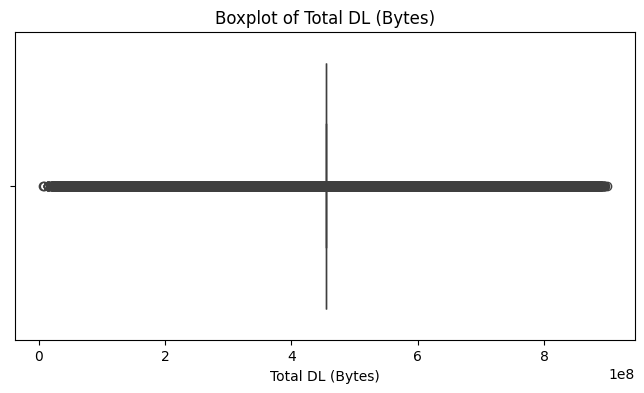

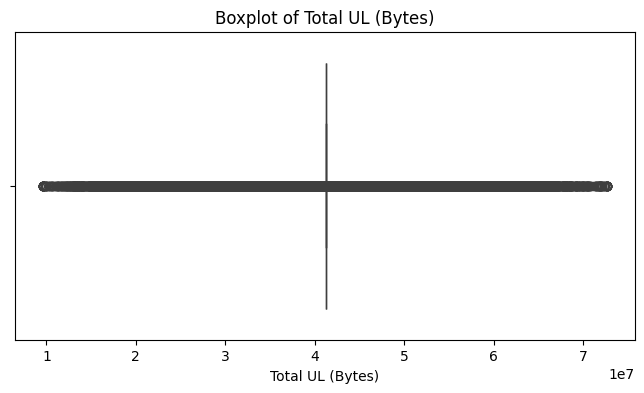

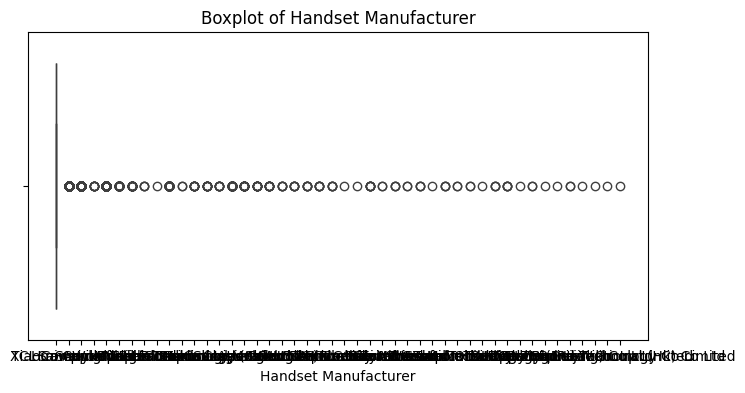

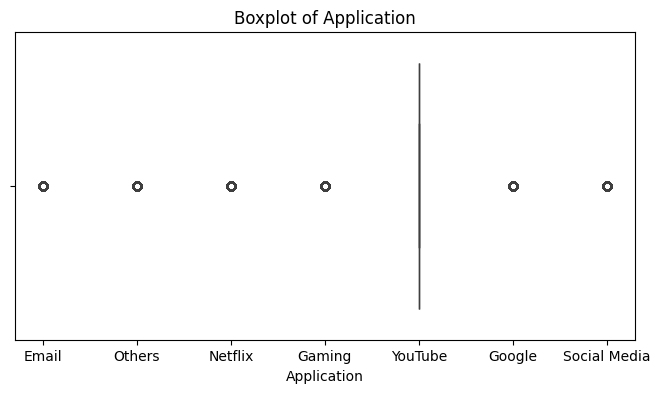

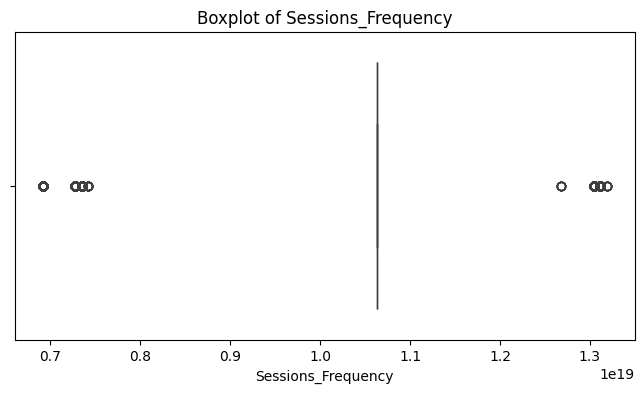

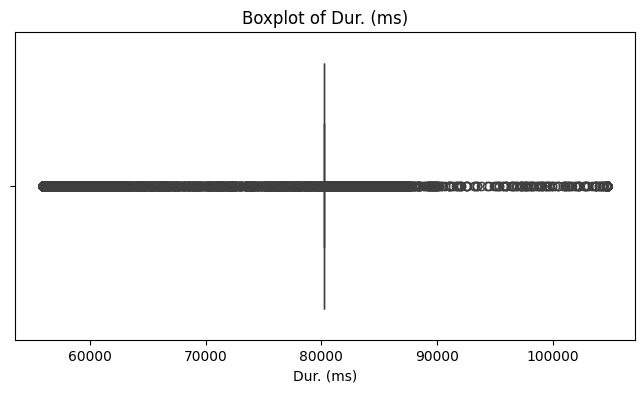

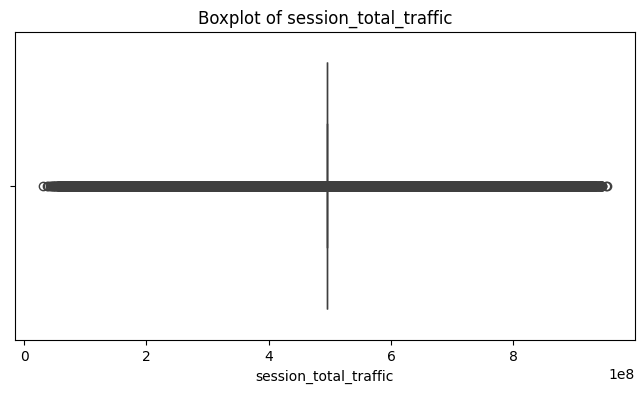

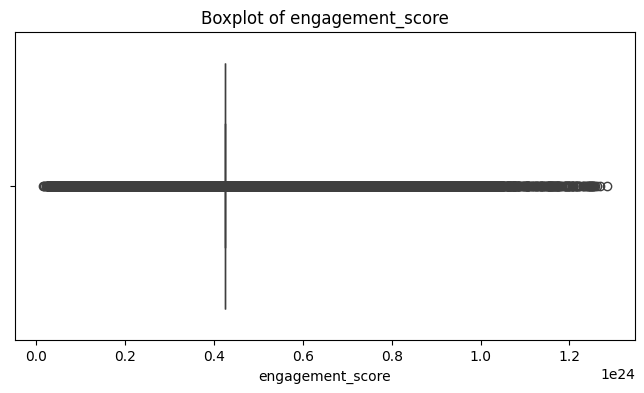

In [21]:
# Identify and visualize outliers for each column after removing.

for column in satisfaction_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=satisfaction_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Engagement score to each user.

In [22]:
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
kmeans.fit(satisfaction_df[['Experience Score', 'engagement_score']])  # Fit the model to your data

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)


[[4.90970510e-01 4.27485952e+23]
 [4.72430547e-01 8.43658340e+23]
 [4.70779199e-01 1.76143094e+23]]


In [23]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Find the less engaged cluster center (assuming the first cluster is the least engaged)
less_engaged_center = cluster_centers[0]

# Calculate Euclidean distance to the less engaged cluster center
satisfaction_df['engagement_score'] = pairwise_distances(
    satisfaction_df[['Experience Score', 'engagement_score']],
    [less_engaged_center]
)[:, 0]



In [24]:
print(satisfaction_df.head())

   TCP Retransmission         RTT                       Handset Type  \
0        1.584457e+07   75.636695             Apple iPhone 7 (A1778)   
1        2.156957e+07  115.000000            Apple iPhone Se (A1723)   
2        6.192340e+05  152.000000             Apple iPhone 6 (A1586)   
3        1.842327e+07  123.229294  Samsung Galaxy S8 Plus (Sm-G955F)   
4        2.156957e+07   34.000000        Apple iPhone 7 Plus (A1784)   

     Throughput  Cluster  Experience Score  MSISDN/Number  Total DL (Bytes)  \
0   9796.009749        0          0.498669   3.366447e+10       535118044.0   
1     70.000000        0          0.341497   3.365875e+10       422406937.0   
2   9792.000000        1          0.440646   3.366274e+10        93360974.0   
3  25303.250000        0          0.535384   3.366917e+10       193656366.0   
4    117.000000        0          0.465691   3.366555e+10       519351173.0   

   Total UL (Bytes) Handset Manufacturer Application  Sessions_Frequency  \
0        3369173

# Experience score for each user.

In [25]:
# Find the worst experience cluster center (assuming the first cluster is the worst)
worst_experience_center = cluster_centers[0]

# Calculate Euclidean distance to the worst experience cluster center
satisfaction_df['Experience_Distance'] = pairwise_distances(
    satisfaction_df[['Experience Score', 'engagement_score']],
    [worst_experience_center]
)[:, 0]

print(satisfaction_df.head())


   TCP Retransmission         RTT                       Handset Type  \
0        1.584457e+07   75.636695             Apple iPhone 7 (A1778)   
1        2.156957e+07  115.000000            Apple iPhone Se (A1723)   
2        6.192340e+05  152.000000             Apple iPhone 6 (A1586)   
3        1.842327e+07  123.229294  Samsung Galaxy S8 Plus (Sm-G955F)   
4        2.156957e+07   34.000000        Apple iPhone 7 Plus (A1784)   

     Throughput  Cluster  Experience Score  MSISDN/Number  Total DL (Bytes)  \
0   9796.009749        0          0.498669   3.366447e+10       535118044.0   
1     70.000000        0          0.341497   3.365875e+10       422406937.0   
2   9792.000000        1          0.440646   3.366274e+10        93360974.0   
3  25303.250000        0          0.535384   3.366917e+10       193656366.0   
4    117.000000        0          0.465691   3.366555e+10       519351173.0   

   Total UL (Bytes) Handset Manufacturer Application  Sessions_Frequency  \
0        3369173

# Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer

In [26]:
# Calculate the average of engagement and experience scores
satisfaction_df['Satisfaction Score'] = (satisfaction_df['engagement_score'] + satisfaction_df['Experience Score']) / 2

# Sort the DataFrame by Satisfaction Score in descending order
sorted_df = satisfaction_df.sort_values(by='Satisfaction Score', ascending=False)

# Get the top 10 satisfied customers
top_10_satisfied = sorted_df.head(10)

# Display the top 10 satisfied customers
print(top_10_satisfied)


       TCP Retransmission         RTT                        Handset Type  \
2942         2.156957e+07   17.000000             Apple iPhone 6S (A1688)   
11613        2.156957e+07   47.000000  Huawei Mate 10 Lite Huawei Nova 2I   
8021         4.733763e+06  153.000000        Wiko Global Sasu Wiko Lenny3   
7141         2.156957e+07  127.458589       Samsung Galaxy S9 Sm-G960F Ds   
11787        3.441470e+05   54.000000       Xiaomi Communica. Redmi Note5   
3025         1.096412e+07   83.229294        Samsung Galaxy S8 (Sm-G950F)   
14472        2.156957e+07   27.000000         Apple iPhone 8 Plus (A1897)   
14509        2.156957e+07   38.000000              Apple iPhone 7 (A1778)   
2997         2.156957e+07  127.458589        Samsung Galaxy S7 (Sm-G930X)   
5567         5.553200e+04   49.000000        Samsung Galaxy S7 (Sm-G930X)   

         Throughput  Cluster  Experience Score  MSISDN/Number  \
2942     174.000000        0          0.492119   3.375690e+10   
11613     61.000000   

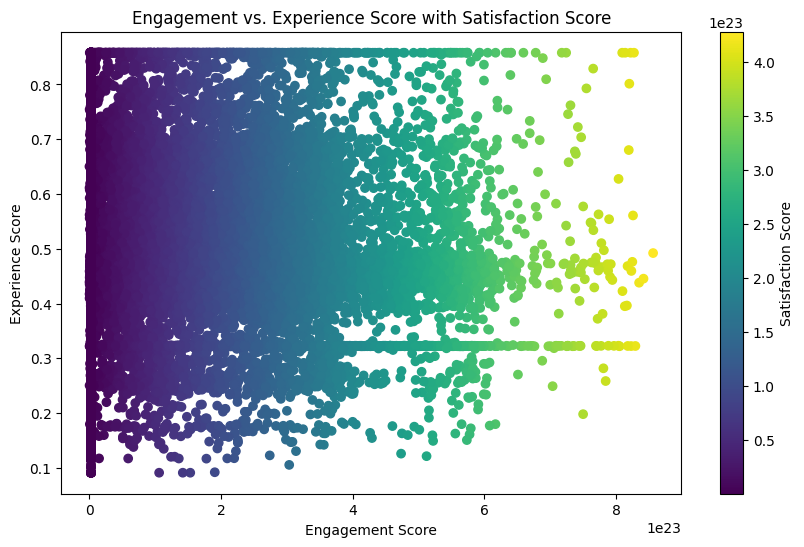

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(satisfaction_df['engagement_score'], satisfaction_df['Experience Score'], c=satisfaction_df['Satisfaction Score'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('Engagement vs. Experience Score with Satisfaction Score')
plt.colorbar(label='Satisfaction Score')
plt.show()

In [28]:

from sklearn.preprocessing import LabelEncoder

In [29]:

# Identify categorical columns
categorical_columns = satisfaction_df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoders = {}

# Create a copy of data_no_duplicates to avoid modifying the original dataset
data_encoded = satisfaction_df.copy()

# Apply label encoding to each categorical column
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_encoded[column] = label_encoders[column].fit_transform(data_encoded[column])

In [30]:

data_encoded.head()

,TCP Retransmission,RTT,Handset Type,Throughput,Cluster,Experience Score,MSISDN/Number,Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Application,Sessions_Frequency,Dur. (ms),session_total_traffic,engagement_score,Experience_Distance,Satisfaction Score
0,1.584457e+07,75.636695,55,9796.009749,0,0.498669,3.366447e+10,535118044.0,33691738.0,12,0,1.311448e+19,104687.0,568809782.0,3.534421e+23,7.404389e+22,1.767210e+23
1,2.156957e+07,115.000000,68,70.000000,0,0.341497,3.365875e+10,422406937.0,26026033.0,12,0,1.304243e+19,104687.0,448432970.0,1.847921e+23,2.426939e+23,9.239603e+22
2,6.192340e+05,152.000000,45,9792.000000,1,0.440646,3.366274e+10,93360974.0,50576233.0,28,4,1.304243e+19,104687.0,143937207.0,2.309581e+23,1.965279e+23,1.154790e+23
3,1.842327e+07,123.229294,875,25303.250000,0,0.535384,3.366917e+10,193656366.0,32643783.0,28,3,1.304243e+19,104687.0,226300149.0,1.185020e+23,3.089840e+23,5.925098e+22
4,2.156957e+07,34.000000,58,117.000000,0,0.465691,3.366555e+10,519351173.0,33314765.0,12,1,1.304243e+19,104687.0,552665938.0,3.271089e+23,1.003771e+23,1.635544e+23


In [31]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Separate features and target variable
X = data_encoded.drop(columns=['Satisfaction Score'])
y = data_encoded['Satisfaction Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:


# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Cross-Validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}')

Cross-validation scores: [0.99999907 0.99999811 0.99999081 0.99999879 0.99999743]
Mean cross-validation score: 0.9999968404769364


In [35]:

# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [36]:

# Evaluate the model
r2_score_rf = rf.score(X_test, y_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [37]:
print(f"Random Forest r2_score: {r2_score_rf*100}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest r2_score: 99.9999372841475
Random Forest MAE: 4.54100344711506e+18
Random Forest RMSE: 4.28444834971188e+19


# Run a k-means (k=2) on the engagement & the experience score.

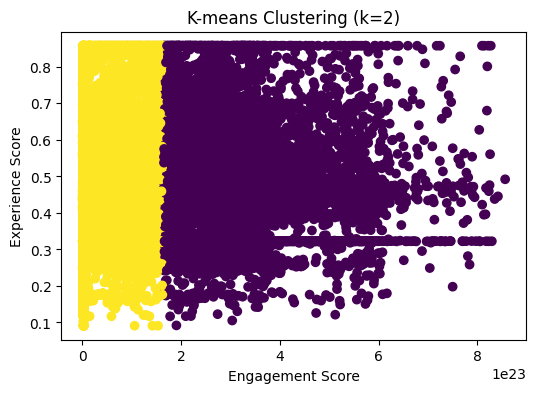

In [38]:
# Select the features for clustering
X_kmeans = satisfaction_df[['engagement_score', 'Experience Score']]

# Apply K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_kmeans)

# Get the cluster labels
satisfaction_df['kmeans_cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(satisfaction_df['engagement_score'], satisfaction_df['Experience Score'], c=satisfaction_df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-means Clustering (k=2)')
plt.show()


# Aggregate the average satisfaction & experience score per cluster.

In [39]:
# Aggregate the average satisfaction & experience score per cluster

cluster_agg = satisfaction_df.groupby('Cluster').agg({'Satisfaction Score': 'mean', 'Experience Score': 'mean'})

print(cluster_agg)


         Satisfaction Score  Experience Score
Cluster                                      
0              2.364782e+22          0.422500
1              2.001169e+22          0.594930
2              6.478972e+21          0.485163


In [40]:


import pickle

# Save the model to a file
filename = 'random_forest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)




In [41]:
# prompt: what is rest of code for above

# Evaluate the loaded model
r2_score_loaded = loaded_model.score(X_test, y_test)
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
rmse_loaded = mean_squared_error(y_test, y_pred_loaded, squared=False)

print(f"Loaded Model r2_score: {r2_score_loaded*100}")
print(f"Loaded Model MAE: {mae_loaded}")
print(f"Loaded Model RMSE: {rmse_loaded}")


Loaded Model r2_score: 99.9999372841475
Loaded Model MAE: 4.54100344711506e+18
Loaded Model RMSE: 4.28444834971188e+19


In [42]:
data_encoded.head()

,TCP Retransmission,RTT,Handset Type,Throughput,Cluster,Experience Score,MSISDN/Number,Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Application,Sessions_Frequency,Dur. (ms),session_total_traffic,engagement_score,Experience_Distance,Satisfaction Score
0,1.584457e+07,75.636695,55,9796.009749,0,0.498669,3.366447e+10,535118044.0,33691738.0,12,0,1.311448e+19,104687.0,568809782.0,3.534421e+23,7.404389e+22,1.767210e+23
1,2.156957e+07,115.000000,68,70.000000,0,0.341497,3.365875e+10,422406937.0,26026033.0,12,0,1.304243e+19,104687.0,448432970.0,1.847921e+23,2.426939e+23,9.239603e+22
2,6.192340e+05,152.000000,45,9792.000000,1,0.440646,3.366274e+10,93360974.0,50576233.0,28,4,1.304243e+19,104687.0,143937207.0,2.309581e+23,1.965279e+23,1.154790e+23
3,1.842327e+07,123.229294,875,25303.250000,0,0.535384,3.366917e+10,193656366.0,32643783.0,28,3,1.304243e+19,104687.0,226300149.0,1.185020e+23,3.089840e+23,5.925098e+22
4,2.156957e+07,34.000000,58,117.000000,0,0.465691,3.366555e+10,519351173.0,33314765.0,12,1,1.304243e+19,104687.0,552665938.0,3.271089e+23,1.003771e+23,1.635544e+23


In [43]:
data_encoded.to_csv('Satisfacton Analysis.csv', index=False)